In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [22]:
df = pd.read_csv("housing.csv")

In [24]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [38]:
df = df.dropna()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [42]:
x = df.drop(columns = "median_house_value")
y = df["median_house_value"]

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [56]:
train_data = x_train.join(y_train)

In [58]:
y_train

20059     49500.0
16050    332100.0
13297    158200.0
4374     210900.0
20127    338100.0
           ...   
13915     65600.0
13893     55400.0
5842     361700.0
19520     99600.0
15299    283300.0
Name: median_house_value, Length: 16346, dtype: float64

In [60]:
train_data  = x_train.join(y_train)

In [62]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20059,-119.27,35.87,12.0,972.0,269.0,1134.0,286.0,1.6300,INLAND,49500.0
16050,-122.48,37.76,48.0,2304.0,558.0,1273.0,512.0,3.2750,NEAR BAY,332100.0
13297,-117.65,34.08,40.0,1609.0,258.0,624.0,242.0,5.4689,INLAND,158200.0
4374,-118.28,34.10,49.0,1767.0,467.0,1066.0,438.0,3.0958,<1H OCEAN,210900.0
20127,-118.98,34.40,34.0,1328.0,244.0,795.0,227.0,4.4219,<1H OCEAN,338100.0
...,...,...,...,...,...,...,...,...,...,...
13915,-116.09,34.15,13.0,9444.0,1997.0,4166.0,1482.0,2.6111,INLAND,65600.0
13893,-116.31,34.13,20.0,2352.0,556.0,1217.0,481.0,1.6063,INLAND,55400.0
5842,-118.31,34.19,42.0,724.0,149.0,420.0,150.0,3.0625,<1H OCEAN,361700.0
19520,-120.99,37.64,41.0,1580.0,385.0,881.0,361.0,2.7538,INLAND,99600.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

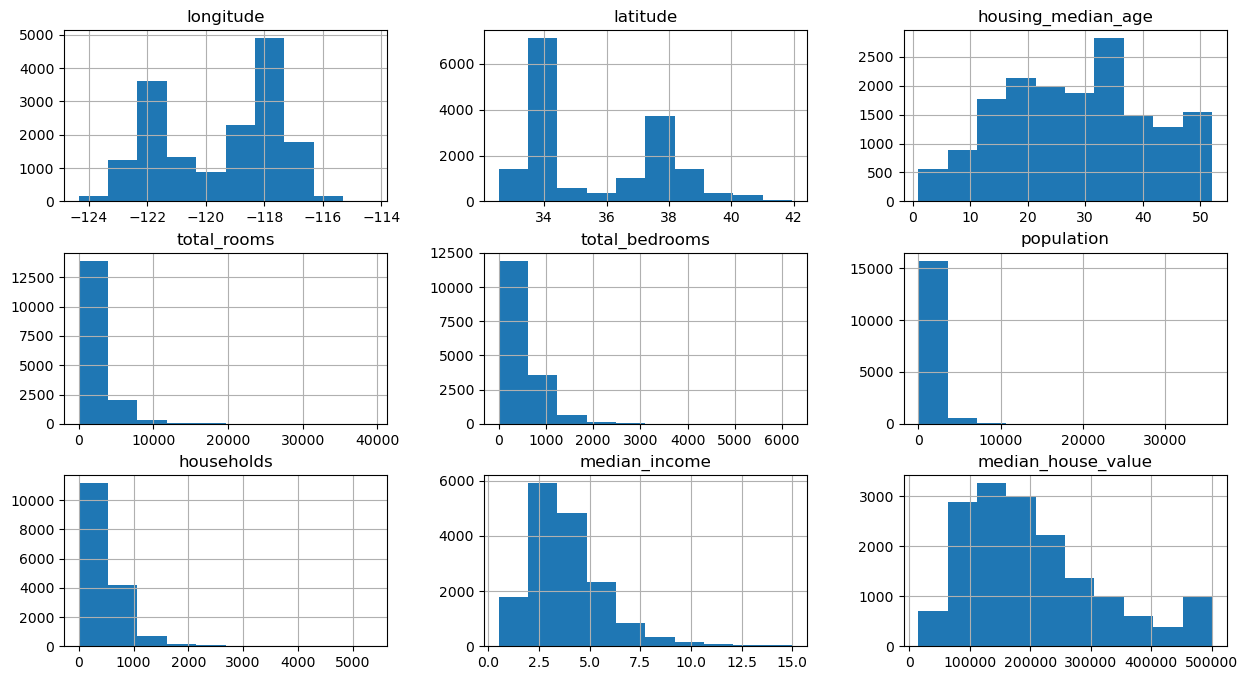

In [64]:
train_data.hist(figsize = (15,8))

In [65]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [68]:
train_data.corr(numeric_only = True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924767,-0.118608,0.047954,0.071655,0.103458,0.058392,-0.011115,-0.044062
latitude,-0.924767,1.000000,0.020052,-0.038540,-0.068706,-0.110590,-0.072959,-0.083956,-0.146391
housing_median_age,-0.118608,0.020052,1.000000,-0.361987,-0.321276,-0.297777,-0.303509,-0.121108,0.104687
total_rooms,0.047954,-0.038540,-0.361987,1.000000,0.929575,0.857272,0.919544,0.201749,0.136160
total_bedrooms,0.071655,-0.068706,-0.321276,0.929575,1.000000,0.876006,0.980391,-0.003092,0.052259
population,0.103458,-0.110590,-0.297777,0.857272,0.876006,1.000000,0.904893,0.010692,-0.021701
households,0.058392,-0.072959,-0.303509,0.919544,0.980391,0.904893,1.000000,0.018243,0.067803
median_income,-0.011115,-0.083956,-0.121108,0.201749,-0.003092,0.010692,0.018243,1.000000,0.689279
median_house_value,-0.044062,-0.146391,0.104687,0.136160,0.052259,-0.021701,0.067803,0.689279,1.000000


<Axes: >

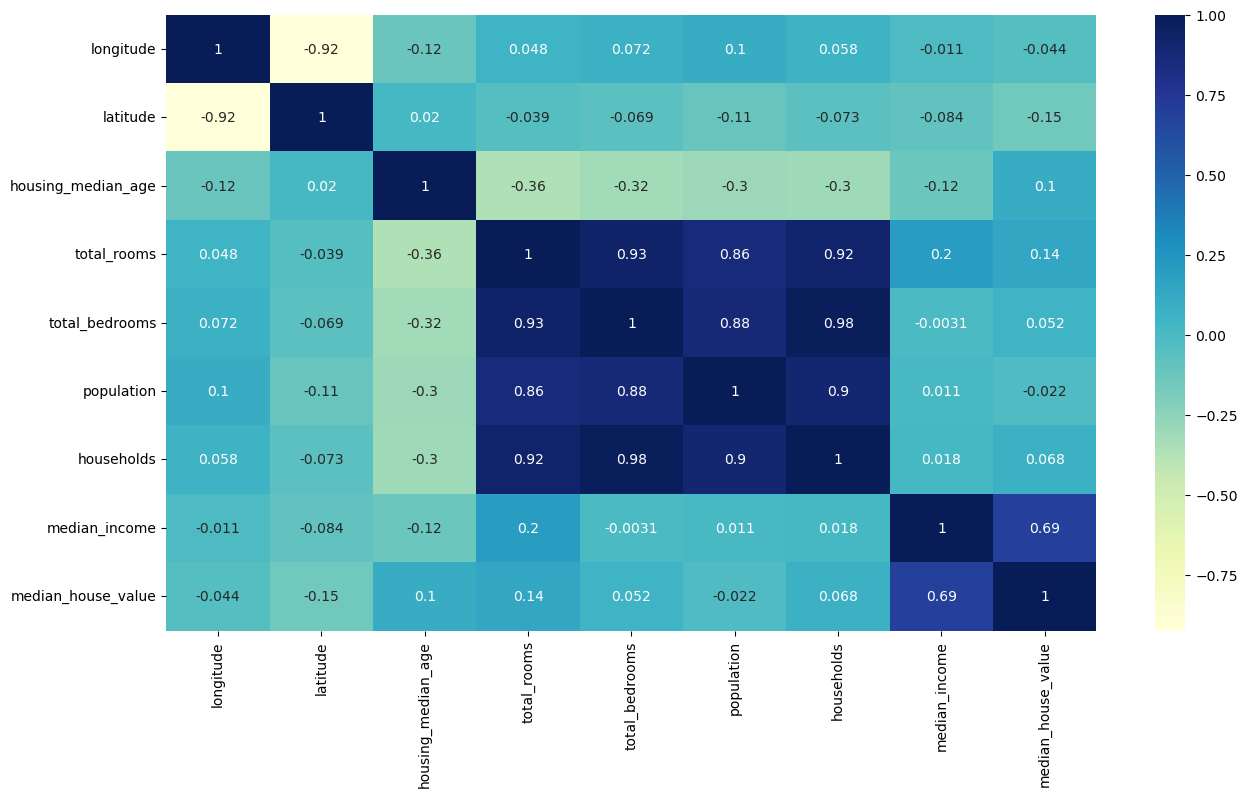

In [70]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only = True), annot=True, cmap="YlGnBu")

In [72]:
train_data["total_rooms"] = np.log(train_data["total_rooms"] +1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] +1)
train_data["population"] = np.log(train_data["population"] +1)
train_data["households"] = np.log(train_data["households"] +1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

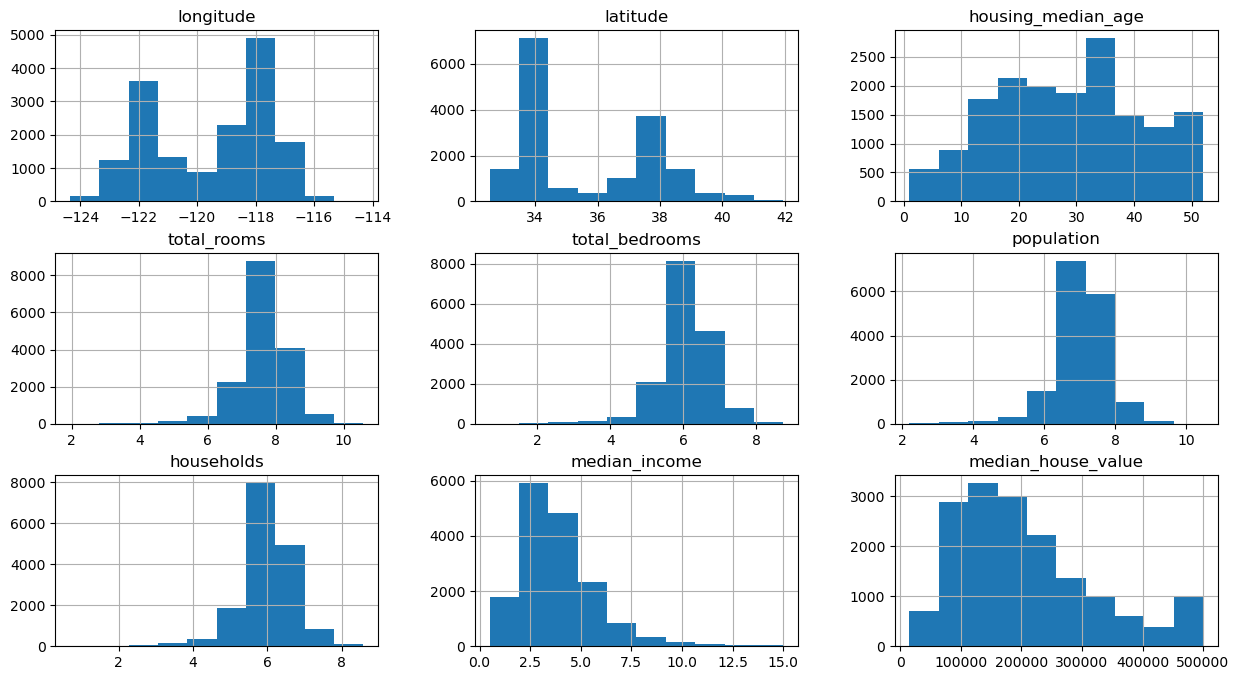

In [74]:
train_data.hist(figsize = (15,8))

In [75]:
train_data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     7203
INLAND        5242
NEAR OCEAN    2104
NEAR BAY      1794
ISLAND           3
Name: count, dtype: int64

In [78]:
train_data = train_data.join(pd.get_dummies(train_data["ocean_proximity"]).astype(int)).drop(columns = "ocean_proximity")

In [80]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20059,-119.27,35.87,12.0,6.880384,5.598422,7.034388,5.659482,1.6300,49500.0,0,1,0,0,0
16050,-122.48,37.76,48.0,7.742836,6.326149,7.149917,6.240276,3.2750,332100.0,0,0,0,1,0
13297,-117.65,34.08,40.0,7.383989,5.556828,6.437752,5.493061,5.4689,158200.0,0,1,0,0,0
4374,-118.28,34.10,49.0,7.477604,6.148468,6.972606,6.084499,3.0958,210900.0,1,0,0,0,0
20127,-118.98,34.40,34.0,7.192182,5.501258,6.679599,5.429346,4.4219,338100.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13915,-116.09,34.15,13.0,9.153241,7.599902,8.334952,7.301822,2.6111,65600.0,0,1,0,0,0
13893,-116.31,34.13,20.0,7.763446,6.322565,7.104965,6.177944,1.6063,55400.0,0,1,0,0,0
5842,-118.31,34.19,42.0,6.586172,5.010635,6.042633,5.017280,3.0625,361700.0,1,0,0,0,0
19520,-120.99,37.64,41.0,7.365813,5.955837,6.782192,5.891644,2.7538,99600.0,0,1,0,0,0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

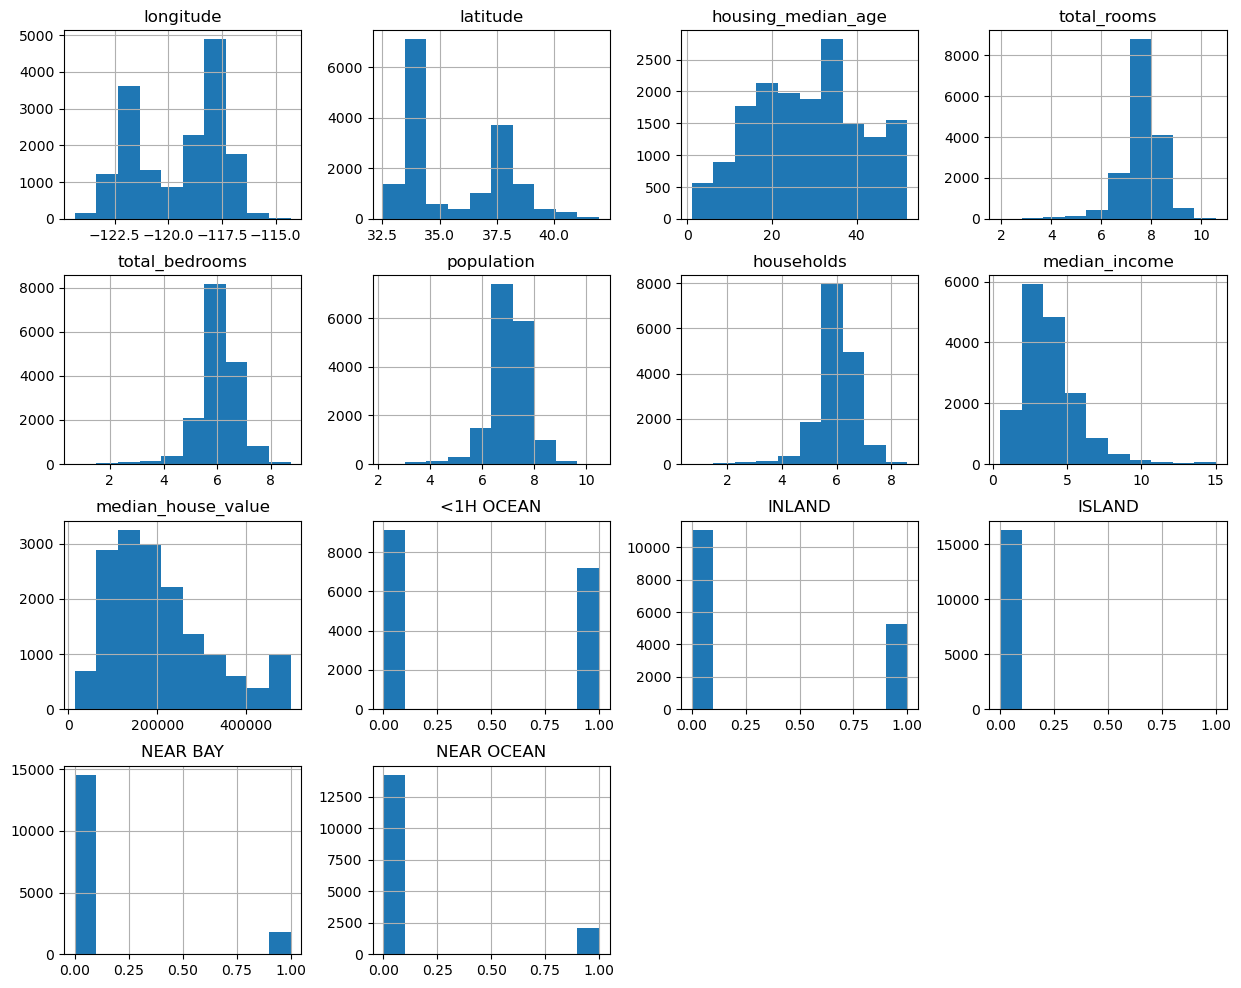

In [82]:
train_data.hist(figsize=(15,12))

In [84]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"]/ train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"]/ train_data["households"]


In [86]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
longitude,1.000000,-0.924767,-0.118608,0.034711,0.064476,0.114185,0.058815,-0.011115,-0.044062,0.320307,-0.056541,0.008476,-0.471170,0.043393,0.099093,-0.067666
latitude,-0.924767,1.000000,0.020052,-0.036461,-0.071031,-0.139983,-0.089898,-0.083956,-0.146391,-0.447299,0.352402,-0.014581,0.355008,-0.158808,-0.114224,0.138552
housing_median_age,-0.118608,0.020052,1.000000,-0.317308,-0.273055,-0.245361,-0.243435,-0.121108,0.104687,0.044626,-0.240319,0.016238,0.268290,0.017706,-0.030934,-0.037044
total_rooms,0.034711,-0.036461,-0.317308,1.000000,0.946518,0.865032,0.933129,0.204263,0.158054,0.020165,-0.010429,-0.000231,-0.023350,0.006446,0.420954,-0.376667
total_bedrooms,0.064476,-0.071031,-0.273055,0.946518,1.000000,0.897542,0.975544,-0.026290,0.052335,0.040286,-0.043078,0.004453,-0.021734,0.020421,0.681855,-0.550507
population,0.114185,-0.139983,-0.245361,0.865032,0.897542,1.000000,0.930873,-0.004813,-0.021578,0.112692,-0.068385,-0.005311,-0.065675,-0.010240,0.580300,-0.614891
households,0.058815,-0.089898,-0.243435,0.933129,0.975544,0.930873,1.000000,0.003614,0.071846,0.070046,-0.083874,-0.002577,-0.011074,0.023496,0.643804,-0.651106
median_income,-0.011115,-0.083956,-0.121108,0.204263,-0.026290,-0.004813,0.003614,1.000000,0.689279,0.168814,-0.235429,-0.007678,0.053411,0.028317,-0.514082,0.337654
median_house_value,-0.044062,-0.146391,0.104687,0.158054,0.052335,-0.021578,0.071846,0.689279,1.000000,0.259736,-0.485117,0.021313,0.161315,0.139634,-0.201924,0.119167
<1H OCEAN,0.320307,-0.447299,0.044626,0.020165,0.040286,0.112692,0.070046,0.168814,0.259736,1.000000,-0.609847,-0.012026,-0.311646,-0.341153,0.073664,-0.125644


In [114]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
20059,-119.27,35.87,12.0,6.880384,5.598422,7.034388,5.659482,1.6300,0,1,0,0,0,0.813679,1.215727
16050,-122.48,37.76,48.0,7.742836,6.326149,7.149917,6.240276,3.2750,0,0,0,1,0,0.817033,1.240784
13297,-117.65,34.08,40.0,7.383989,5.556828,6.437752,5.493061,5.4689,0,1,0,0,0,0.752551,1.344239
4374,-118.28,34.10,49.0,7.477604,6.148468,6.972606,6.084499,3.0958,1,0,0,0,0,0.822251,1.228960
20127,-118.98,34.40,34.0,7.192182,5.501258,6.679599,5.429346,4.4219,1,0,0,0,0,0.764894,1.324687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13915,-116.09,34.15,13.0,9.153241,7.599902,8.334952,7.301822,2.6111,0,1,0,0,0,0.830296,1.253556
13893,-116.31,34.13,20.0,7.763446,6.322565,7.104965,6.177944,1.6063,0,1,0,0,0,0.814402,1.256639
5842,-118.31,34.19,42.0,6.586172,5.010635,6.042633,5.017280,3.0625,1,0,0,0,0,0.760781,1.312698
19520,-120.99,37.64,41.0,7.365813,5.955837,6.782192,5.891644,2.7538,0,1,0,0,0,0.808578,1.250213


In [164]:
x_train, y_train = train_data.drop(columns = "median_house_value"), train_data["median_house_value"]

In [167]:
reg = LinearRegression()

In [169]:
reg.fit(x_train, y_train)

LinearRegression()

In [160]:
test_data  = x_test.join(y_test)
test_data["total_rooms"] = np.log(test_data["total_rooms"] +1)
test_data["total_bedrooms"] = np.log(test_data["total_bedrooms"] +1)
test_data["population"] = np.log(test_data["population"] +1)
test_data["households"] = np.log(test_data["households"] +1)
test_data = test_data.join(pd.get_dummies(test_data["ocean_proximity"]).astype(int)).drop(columns = "ocean_proximity")
test_data["bedroom_ratio"] = test_data["total_bedrooms"]/ test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"]/ test_data["households"]
x_test, y_test = test_data.drop(columns = "median_house_value"), test_data["median_house_value"]

KeyError: 'ocean_proximity'

In [171]:
reg.score(x_test, y_test)

0.6737180352876508

In [188]:
forest = RandomForestRegressor()
forest.fit(x_train, y_train)

RandomForestRegressor()

In [190]:
forest.score(x_test, y_test)

0.8118203816118753